In [ ]:
# 이 방식은, 파이썬 스크립트에서 동작할 것.
# 
if __name__ == '__main__':
    if __package__ is None:
        import sys
        from os import path
        print(path.dirname(path.dirname(path.abspath(__file__))))
        sys.path.append(path.dirname(path.dirname(path.abspath(__file__))))
        from 상위패키지.하위패키지 import 함수
    else:
        from .하위패키지 import 함수

In [4]:
# proteinGroups 전처리
import pandas as pd
from jobs import processing_base

txtpath = './raw/TestSample/202212/THP1/'

job = processing_base.process_base(txtpath)
job.proteinGroups_base()

message! >>> 82 (2.10%) entries were dropped, [Potential contaminant] column removed.
message! >>> 75 (1.96%) entries were dropped, [Reverse] column removed.
message! >>> 64 (1.71%) entries were dropped, [Only identified by site] column removed.
message! >>> 995 (27.02%) entries were dropped. [Razor + unique peptides = 1]
message! >>> 2687 entries left.
message! >>> [Protein IDs] elements were splitted
message! >>> [Best MS/MS] elements were splitted
message! >>> file created... C:\Users\simhc\Documents\Github\proteome-tool\output\proteinGroups_base_20230128-223929.csv


'C:\\Users\\simhc\\Documents\\Github\\proteome-tool\\output\\proteinGroups_base_20230128-223929.csv'

In [1]:
# current working directory 변경! 필수 !
# 전처리 된 csv 바로 불러오기.
import os
import pandas as pd

os.chdir('C:/Users/simhc/Documents/Github/proteome-tool/')
os.getcwd()

df_base = pd.read_csv(filepath_or_buffer='./output/proteinGroups_base_20230128-223929.csv', encoding='utf-8')

In [3]:
import re

def rename_reporter(df, **kwargs):
    # matched with kwargs key in dataframe columns --> kwargs value
    new_names={}
    base_cols = pd.Index(df.columns).tolist()
    for key in kwargs:
        for col in base_cols:
            if re.search(str(key), col):
                new_names[str(col)] = kwargs[key] + col[20:]
                # col[:20] --> "Reporter intensity #"
    df = df.rename(columns=new_names, inplace=False)
    return df

default_set = {
    'Reporter intensity 1' : 'Control',
    'Reporter intensity 2' : 'Low',
    'Reporter intensity 3' : 'High',
}

job = rename_reporter(df_base, **default_set)

In [61]:
# Ratio of reporters
job['Low/Control 1st'] = job['Low 1st']/job['Control 1st']
job['Low/Control 2nd'] = job['Low 2nd']/job['Control 2nd']
job['Low/Control 3rd'] = job['Low 3rd']/job['Control 3rd']

In [87]:
# Normalize with median-scaling
m1 = job['Low/Control 1st'].median()
m2 = job['Low/Control 2nd'].median()
m3 = job['Low/Control 3rd'].median()

job['Normalized Low/Control 1st'] = job['Low/Control 1st'] / m1
job['Normalized Low/Control 2nd'] = job['Low/Control 2nd'] / m2
job['Normalized Low/Control 3rd'] = job['Low/Control 3rd'] / m3

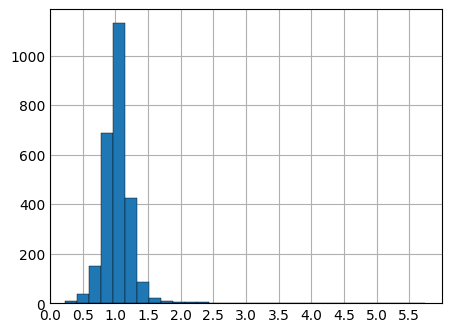

In [52]:
# Histogram non-normalize
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')
px = 1/plt.rcParams['figure.dpi'] # pixel in inches

# data
x = job['Low/Control 1st']

# plot
fig, ax = plt.subplots(figsize=(400*px, 300*px)) # subplots(n, n, figsize)

ax.hist(x, bins=30, linewidth=0.3, edgecolor="black")
ax.set(xlim=(0,6), xticks=np.arange(0,6,step=0.5))
plt.show()

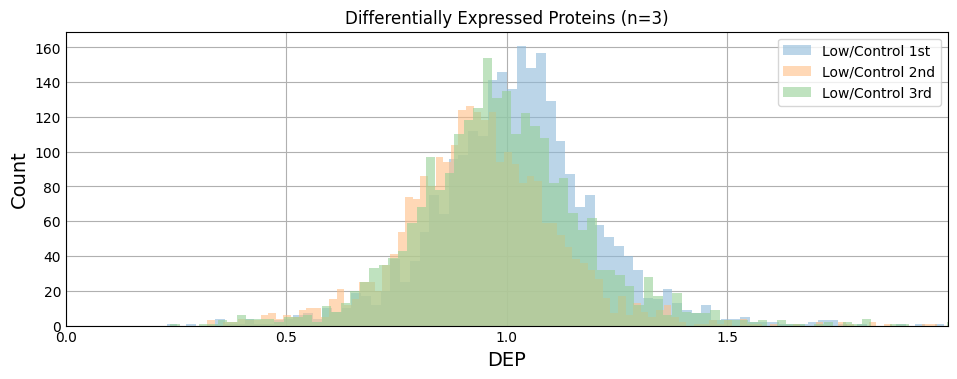

In [104]:
# Histogram with three replication (Non-Normalize)
import numpy as np
import matplotlib.pyplot as plt

#plt.style.use('_mpl-gallery')
px = 1/plt.rcParams['figure.dpi'] # pixel in inches

x1 = job['Low/Control 1st']
x2 = job['Low/Control 2nd']
x3 = job['Low/Control 3rd']

plt.figure(figsize=(900*px,300*px))
plt.hist(x1, bins=250, alpha=0.6, label="Low/Control 1st", color='#8EBAD9') #alpha 투명도
plt.hist(x2, bins=250, alpha=0.6, label="Low/Control 2nd", color='#FFBE86')
plt.hist(x3, bins=250, alpha=0.6, label="Low/Control 3rd", color='#95CF95')
plt.xlim(0,2)
plt.xticks(np.arange(0,2,step=0.5))
plt.xlabel("DEP", size=14)
plt.ylabel("Count", size=14)
plt.title("Differentially Expressed Proteins (n=3)")
plt.legend(loc='upper right')
plt.show()

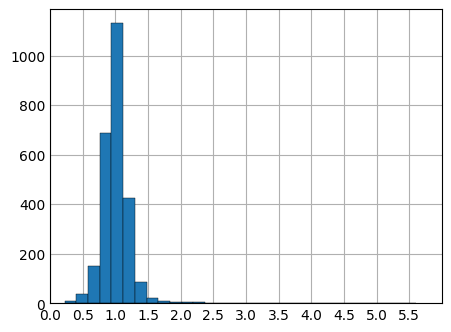

In [88]:
# Histogram after-normalize
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')
px = 1/plt.rcParams['figure.dpi'] # pixel in inches

# data
x = job['Normalized Low/Control 1st']

# plot
fig, ax = plt.subplots(figsize=(400*px, 300*px)) # subplots(n, n, figsize)

ax.hist(x, bins=30, linewidth=0.3, edgecolor="black")
ax.set(xlim=(0,6), xticks=np.arange(0,6,step=0.5))
plt.show()

In [92]:
# Median in every Normalized
m1 = job['Normalized Low/Control 1st'].median()
m2 = job['Normalized Low/Control 2nd'].median()
m3 = job['Normalized Low/Control 3rd'].median()

print('%.4f, %.4f, %.4f' %(m1, m2, m3))

1.0000, 1.0000, 1.0000


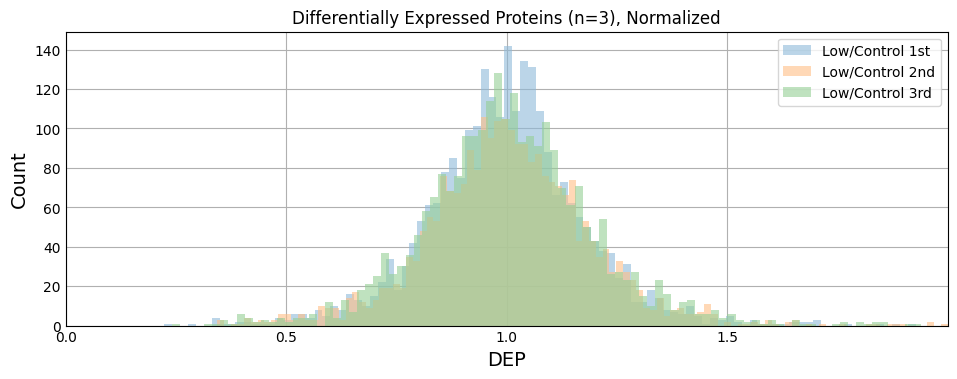

In [105]:
# Histogram with three replication (Normalized)
import numpy as np
import matplotlib.pyplot as plt

#plt.style.use('_mpl-gallery')
px = 1/plt.rcParams['figure.dpi'] # pixel in inches

x1 = job['Normalized Low/Control 1st']
x2 = job['Normalized Low/Control 2nd']
x3 = job['Normalized Low/Control 3rd']

plt.figure(figsize=(900*px,300*px))
plt.hist(x1, bins=300, alpha=0.6, label="Low/Control 1st", color='#8EBAD9') #alpha 투명도
plt.hist(x2, bins=300, alpha=0.6, label="Low/Control 2nd", color='#FFBE86')
plt.hist(x3, bins=300, alpha=0.6, label="Low/Control 3rd", color='#95CF95')
plt.xlim(0,2)
plt.xticks(np.arange(0,2,step=0.5))
plt.xlabel("DEP", size=14)
plt.ylabel("Count", size=14)
plt.title("Differentially Expressed Proteins (n=3), Normalized")
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Normality 검정 전, normalization이 올바른 방법으로 수행되었는가 ???

# Normality test (정규성 검정)
# t-test 등이 데이터의 정규분포를 가정하고 수행되므로, 검정 과정이 필수.
# 중심극한정리: 표본수 30 이상에서 정규분포에 가까워진다. 그러나 절대적이지 않으므로 정규분포 정도를 확인해야한다.

# Normality test
# A. Shapiro-Wilks test (n<2000)
# B. Kolmogorove-Smirnov test (n>2000) --> scipy.stats.kstest
# C. Quantile-Quantile plot (Graphic test)

In [ ]:
from scipy import stats

# Kolmogorove-Smirnov test (1 sample test)
stats.ks_1samp(x1, )

